# 5 minutes into oemof-solph

## General information

[oemof.solph](https://oemof-solph.readthedocs.io/en/stable/readme.html) is a tool to facilitate the formulation of
(mixed integer) linear problems for dispatch, unit commitment, and investmentment problems in sector-intregrated energy
systems. It does so by compiling a comprehensive, graph-based description of the energy system into a linear program
using [Pyomo](http://www.pyomo.org/) {cite}`hart2011`, {cite}`bynum2021`, that can than be solved using a linear
optimiser of choice.

The graph consists of three types of entities:
- `Bus`es (Type of nodes that maintain energy balance)
- `components` (Type of nodes that model technologies)
- `Flow`s (directed edges with time-dependent power transport)

- Mini Code example: Buses, Components (Converter, Source, Sink, but there are more), EnergySystem, Model

In [6]:
import oemof.solph as solph

heat_demand = [5, 2, 7, 8]

es = solph.EnergySystem(timeindex=solph.create_time_index(2023, number=4), infer_last_interval=False)

b_electricity = solph.Bus(label="electricity")
b_heat_35C = solph.Bus(label="heat 35C")
es.add(b_electricity, b_heat_35C)

electricity_grid = solph.components.Source(
    label="electricity grid",
    outputs={b_electricity: solph.Flow(variable_costs=0.4)},  # €/kWh
)

heat_demand = solph.components.Sink(
    label="heat demand",
    inputs={b_heat_35C: solph.Flow(nominal_value=1, fix=heat_demand)},  # kW
)
es.add(electricity_grid, heat_demand)

heating_rod = solph.components.Converter(
    label="heating rod",
    inputs={b_electricity: solph.Flow()},
    outputs={b_heat_35C: solph.Flow()},
)

es.add(heating_rod)

model = solph.Model(energysystem=es)

model.solve()


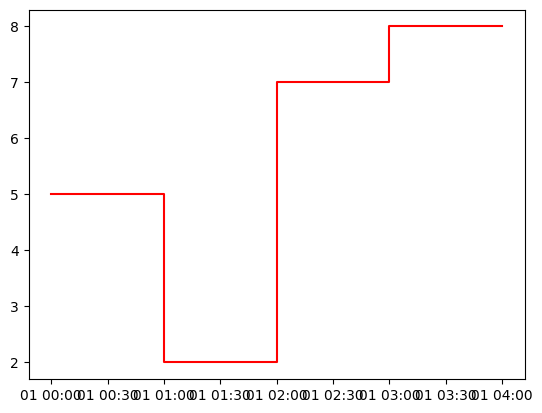

In [8]:
import matplotlib.pyplot as plt

results = solph.processing.results(model)

heat_supply = results[(b_heat_35C, heat_demand)]["sequences"]["flow"]

plt.figure()
plt.plot(heat_supply, "r-", label="heat supply", drawstyle="steps-post")

plt.show()